Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df = pd.read_csv('/content/appearances.csv')

# Display first 5 rows
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004.0,853.0,235.0,2012-07-03,Aurélien Joachim,CLQ,0.0,0.0,2.0,0.0,90.0
1,2233748_79232,2233748,79232.0,8841.0,2698.0,2012-07-05,Ruslan Abyshov,ELQ,0.0,0.0,0.0,0.0,90.0
2,2234413_42792,2234413,42792.0,6251.0,465.0,2012-07-05,Sander Puri,ELQ,0.0,0.0,0.0,0.0,45.0
3,2234418_73333,2234418,73333.0,1274.0,6646.0,2012-07-05,Vegar Hedenstad,ELQ,0.0,0.0,0.0,0.0,90.0
4,2234421_122011,2234421,122011.0,195.0,3008.0,2012-07-05,Markus Henriksen,ELQ,0.0,0.0,0.0,1.0,90.0


Basic Information

In [3]:
# Shape of Data
print("Shape of Dataset:", df.shape)

# Column Names
print("Columns in Dataset:", df.columns)

# Data Types
print(df.dtypes)

# Check Missing Values
print(df.isnull().sum())

Shape of Dataset: (108397, 13)
Columns in Dataset: Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')
appearance_id              object
game_id                     int64
player_id                 float64
player_club_id            float64
player_current_club_id    float64
date                       object
player_name                object
competition_id             object
yellow_cards              float64
red_cards                 float64
goals                     float64
assists                   float64
minutes_played            float64
dtype: object
appearance_id             0
game_id                   0
player_id                 1
player_club_id            1
player_current_club_id    1
date                      1
player_name               1
competition_id            1
yellow_cards              1
red_

Handle Missing Values

In [4]:
# Filling missing values with 0
df.fillna(0, inplace=True)

# Recheck Missing Values
print(df.isnull().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64


Check Duplicate

In [5]:
# Check for Duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


Summary Statistics

In [6]:
# Numerical Data Summary
df.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.083970e+05,108397.000000,108397.000000,108397.000000,108397.000000,108397.000000,108397.000000,108397.000000,108397.000000
mean,2.243470e+06,56051.857533,1843.272461,3300.178105,0.156942,0.004917,0.099652,0.082096,71.845162
std,2.755842e+04,47512.321868,3461.393506,8296.903574,0.376999,0.069950,0.337399,0.298810,28.612446
min,2.227000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.224911e+06,21496.000000,265.000000,366.000000,0.000000,0.000000,0.000000,0.000000,61.000000
50%,2.243008e+06,44060.000000,720.000000,982.000000,0.000000,0.000000,0.000000,0.000000,90.000000
75%,2.251454e+06,75224.000000,2282.000000,2698.000000,0.000000,0.000000,0.000000,0.000000,90.000000
max,3.848689e+06,344627.000000,37022.000000,110302.000000,2.000000,1.000000,5.000000,4.000000,120.000000


Univariate Analysis
Value Counts for Categorical Features

In [9]:
# Positions Count
if 'position' in df.columns:
    print(df['position'].value_counts())

    # Plot Positions
    sns.countplot(x='position', data=df)
    plt.xticks(rotation=45)
    plt.title("Player Position Count")
    plt.show()

Goals Distribution

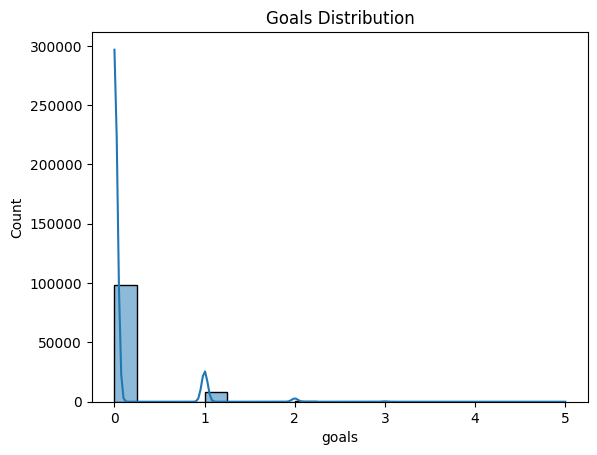

In [10]:
sns.histplot(df['goals'], bins=20, kde=True)
plt.title("Goals Distribution")
plt.show()

Minutes Played Distribution

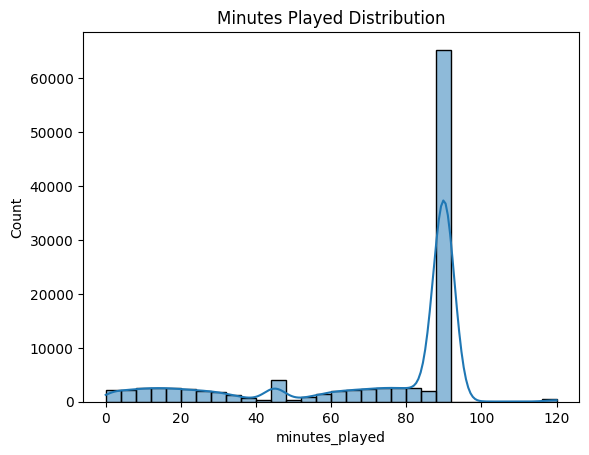

In [11]:
sns.histplot(df['minutes_played'], bins=30, kde=True)
plt.title("Minutes Played Distribution")
plt.show()

 Bivariate Analysis

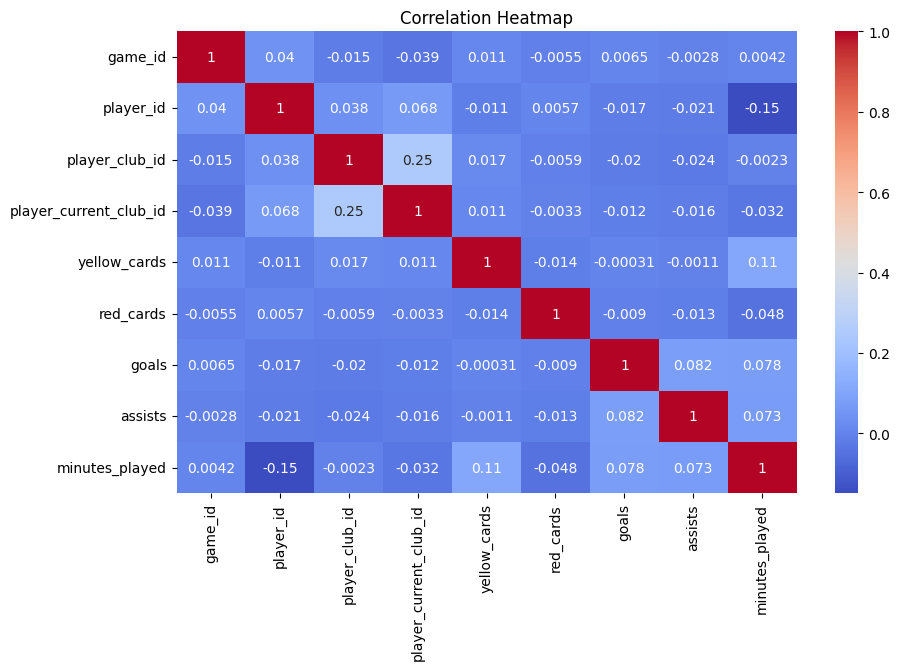

In [14]:
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Position vs Goals

In [16]:
# Check if 'position' column exists before grouping
if 'position' in df.columns:
    df.groupby('position')['goals'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title("Average Goals by Position")
    plt.ylabel("Average Goals")
    plt.show()
else:
    print("Column 'position' not found in the DataFrame.")


Column 'position' not found in the DataFrame.


Position vs Yellow Cards

In [20]:
# Check if 'position' column exists before grouping
if 'position' in df.columns:
    df.groupby('position')['yellow_cards'].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
    plt.title("Average Yellow Cards by Position")
    plt.ylabel("Average Yellow Cards")
    plt.show()
else:
    print("Column 'position' not found in the DataFrame.")

Column 'position' not found in the DataFrame.


Feature Engineering

In [21]:
# Goals Per 90 Minutes
df['goals_per_90'] = (df['goals'] / df['minutes_played']) * 90

# Contribution Score
df['contribution'] = df['goals'] + df['assists']

# Aggression Score
df['aggression'] = df['yellow_cards'] + df['red_cards']

# Display New Features
df[['goals_per_90', 'contribution', 'aggression']].head()


,goals_per_90,contribution,aggression
0,2.0,2.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0


 Final Insights Extraction

In [22]:
# Top 10 Players with Highest Contribution
top_contributors = df.groupby('player_id')['contribution'].sum().sort_values(ascending=False).head(10)
print(top_contributors)

# Top 10 Most Aggressive Players
top_aggression = df.groupby('player_id')['aggression'].sum().sort_values(ascending=False).head(10)
print(top_aggression)


player_id
28003.0    73.0
8198.0     53.0
3455.0     43.0
44068.0    41.0
81808.0    40.0
44352.0    40.0
38253.0    40.0
4380.0     36.0
90024.0    35.0
36139.0    34.0
Name: contribution, dtype: float64
player_id
25942.0    18.0
7476.0     16.0
20730.0    16.0
21905.0    15.0
7828.0     15.0
21175.0    15.0
63290.0    15.0
21763.0    15.0
40888.0    15.0
22550.0    15.0
Name: aggression, dtype: float64


Feature Selection for Regression

In [25]:
# Drop columns not useful for regression
# Check if columns exist before dropping
columns_to_drop = ['player_id']
for col in ['team_id', 'position']:
    if col in df.columns:
        columns_to_drop.append(col)

df_model = df.drop(columns_to_drop, axis=1)

# Define X and y
X = df_model.drop('goals', axis=1)
y = df_model['goals']



Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection
Linear Regression

In [12]:
# Drop columns not useful for regression
# Check if columns exist before dropping
columns_to_drop = ['player_id']  # Remove 'date' from initial list
for col in ['team_id', 'position']:
    if col in df.columns:
        columns_to_drop.append(col)

# Only drop 'date' if it exists
if 'date' in df.columns:
    columns_to_drop.append('date')

df_model = df.drop(columns_to_drop, axis=1)

# Define X and y
X = df_model.drop('goals', axis=1)
y = df_model['goals']

Random Forest Regressor

Model Evaluation
Import Metrics

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Dataset
df = pd.read_csv('appearances.csv')

if 'performance' not in df.columns:
    df['performance'] = df['goals']

numeric_cols = df.select_dtypes(include=['number']).columns
if 'performance' in df.columns and 'performance' not in numeric_cols:
    numeric_cols = numeric_cols.insert(0, 'performance')
df = df[numeric_cols]

# Split Features and Target
X = df.drop('performance', axis=1)  # Features
y = df['performance']               # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
model = RandomForestClassifier()

# Train the Model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9999941180449557


In [16]:
df.isnull().sum()

,0
game_id,0
player_id,0
player_club_id,0
player_current_club_id,0
yellow_cards,0
red_cards,0
goals,0
assists,0
minutes_played,0
performance,0
